In [190]:
import pandas as pd
import numpy as np

In [191]:
data=pd.read_csv('housing.csv')

In [192]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,House Price
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700


In [193]:
data=data.dropna().drop_duplicates()

In [194]:
# now the task is to apply linear and logistic regression
features=data[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']]
prediction=pd.DataFrame(data['House Price'])

<AxesSubplot:>

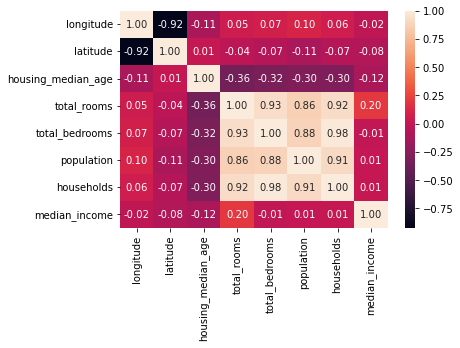

In [195]:
import seaborn as sns
sns.heatmap(features.corr(),annot=True,fmt='.2f')

In [196]:
# now droping redundant columns based on correlation
features=data[['latitude','housing_median_age','total_bedrooms','population','median_income']]
# longitude is highly dependant on latitude
# total_rooms, households are highly dependant on total_bedrooms and population

In [197]:
# normalizing data
features.iloc[:,0]=(features.iloc[:,0]-min(features.iloc[:,0]))/(max(features.iloc[:,0])-min(features.iloc[:,0]))
features.iloc[:,1]=(features.iloc[:,1]-min(features.iloc[:,1]))/(max(features.iloc[:,1])-min(features.iloc[:,1]))
features.iloc[:,2]=(features.iloc[:,2]-min(features.iloc[:,2]))/(max(features.iloc[:,2])-min(features.iloc[:,2]))
features.iloc[:,3]=(features.iloc[:,3]-min(features.iloc[:,3]))/(max(features.iloc[:,3])-min(features.iloc[:,3]))
features.iloc[:,4]=(features.iloc[:,4]-min(features.iloc[:,4]))/(max(features.iloc[:,4])-min(features.iloc[:,4]))
prediction.iloc[:,0]=(prediction.iloc[:,0]-min(prediction.iloc[:,0]))/(max(prediction.iloc[:,0])-min(prediction.iloc[:,0]))

/var/folders/cr/hc4rlj593_13pvcn96cdsn6h0000gn/T/ipykernel_18542/1580943284.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.iloc[:,0]=(features.iloc[:,0]-min(features.iloc[:,0]))/(max(features.iloc[:,0])-min(features.iloc[:,0]))
/var/folders/cr/hc4rlj593_13pvcn96cdsn6h0000gn/T/ipykernel_18542/1580943284.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.iloc[:,1]=(features.iloc[:,1]-min(features.iloc[:,1]))/(max(features.iloc[:,1])-min(features.iloc[:,1]))
/var/folders/cr/hc4rlj593_13

In [198]:
# now we are splitting data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, prediction, test_size=0.3, random_state=42)

In [211]:
X_train.head()

,latitude,housing_median_age,total_bedrooms,population,median_income
19566,0.538789,0.431373,0.137492,0.069060,0.099619
7292,0.153029,0.647059,0.116698,0.083438,0.080592
17618,0.503719,0.509804,0.071850,0.031980,0.316016
17518,0.510096,0.666667,0.094041,0.033353,0.158915
5172,0.149841,0.784314,0.032123,0.019731,0.062785


Linear Regression implementation on training data

In [199]:
weight_vector=np.random.randn(X_train.shape[1])
intercept=0
learning_rate = 0.001

In [200]:
# loss function by mean-squared error
def loss(y,y_predicted):
    n=len(y)
    s=0
    for i in range(n):
        s+=(y[i]-y_predicted[i])**2
    return (1/n)*s

In [201]:
# code for "wx+b"
def predicted_y(weight,x,intercept):
    y_lst=[]
    for i in range(len(x)):
        y_lst.append(weight@x[i]+intercept) #dot product btween weight and input
    return np.array(y_lst)

In [202]:
#derivative of loss w.r.t weight
def dldw(x,y,y_predicted):
    s=0
    n=len(y)
    for i in range(n):
        s+=-x[i]*(y[i]-y_predicted[i])
    return (2/n)*s

In [203]:
# derivative of loss w.r.t bias
def dldb(y,y_predicted):
    n=len(y)
    s=0
    for i in range(len(y)):
        s+=-(y[i]-y_predicted[i])
    return (2/n) * s

In [204]:
for i in range(100):
     y_predicted = predicted_y(weight_vector,X_train.to_numpy(),intercept)
     weight_vector = weight_vector - learning_rate *dldw(X_train.to_numpy(),y_train.to_numpy(),y_predicted)  #update weight
     intercept = intercept - learning_rate * dldb(y_train.to_numpy(),y_predicted)    #update bias

In [205]:
print('Weight : ',weight_vector)
print('Bias : ',intercept)

Weight :  [-0.80104373 -0.58575437  0.45988037  0.82646127 -0.14748502]
Bias :  [0.17842469]


In [206]:
y_pred=predicted_y(weight_vector,X_test.to_numpy(),intercept)

In [207]:
y_train.head()

,House Price
19566,0.161651
7292,0.234640
17618,0.644329
17518,0.465773
5172,0.146806


In [208]:
len(y_pred)


6130

In [209]:
len(y_test)

6130

In [210]:
print(loss(y_pred,y_test))

KeyError: 0